In [28]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data  = pd.read_csv('HR_comma_sep.csv')

In [12]:
data.head(40)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [13]:

# from sklearn.preprocessing import StandardScaler
# features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']
# # extracting out the features
# x = data.loc[:, features].values
# # Standardizing the features
# x_standardized = StandardScaler().fit_transform(x)
# x_standardized

In [14]:
columns_names=data.columns.tolist()
print("Columns names:")
print(columns_names)

Columns names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']


In [15]:
df_drop=data.drop(labels=['sales','salary'],axis=1)
df_drop.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [16]:
cols = df_drop.columns.tolist()
cols

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years']

In [17]:
cols.insert(0, cols.pop(cols.index('left')))
cols

['left',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']

In [18]:
df_drop = df_drop.reindex(columns=cols)


In [19]:
X = df_drop.iloc[:,1:8].values
y = df_drop.iloc[:,0].values
X

array([[0.38, 0.53, 2.  , ..., 3.  , 0.  , 0.  ],
       [0.8 , 0.86, 5.  , ..., 6.  , 0.  , 0.  ],
       [0.11, 0.88, 7.  , ..., 4.  , 0.  , 0.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 3.  , 0.  , 0.  ],
       [0.11, 0.96, 6.  , ..., 4.  , 0.  , 0.  ],
       [0.37, 0.52, 2.  , ..., 3.  , 0.  , 0.  ]])

In [20]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [21]:
np.shape(X)

(14999, 7)

In [22]:
# data standardization
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [23]:
# Covariance matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00006668  0.10502822 -0.14297912 -0.02004945 -0.1008728   0.05870115
   0.02560689]
 [ 0.10502822  1.00006668  0.34935588  0.33976445  0.1315995  -0.00710476
  -0.00868435]
 [-0.14297912  0.34935588  1.00006668  0.41723845  0.19679901 -0.00474086
  -0.00606436]
 [-0.02004945  0.33976445  0.41723845  1.00006668  0.12776343 -0.01014356
  -0.00354465]
 [-0.1008728   0.1315995   0.19679901  0.12776343  1.00006668  0.00212056
   0.06743742]
 [ 0.05870115 -0.00710476 -0.00474086 -0.01014356  0.00212056  1.00006668
   0.03924805]
 [ 0.02560689 -0.00868435 -0.00606436 -0.00354465  0.06743742  0.03924805
   1.00006668]]


In [24]:
print('NumPy covariance matrix:\n%s' %np.cov(X_std.T))

NumPy covariance matrix:
[[ 1.00006668  0.10502822 -0.14297912 -0.02004945 -0.1008728   0.05870115
   0.02560689]
 [ 0.10502822  1.00006668  0.34935588  0.33976445  0.1315995  -0.00710476
  -0.00868435]
 [-0.14297912  0.34935588  1.00006668  0.41723845  0.19679901 -0.00474086
  -0.00606436]
 [-0.02004945  0.33976445  0.41723845  1.00006668  0.12776343 -0.01014356
  -0.00354465]
 [-0.1008728   0.1315995   0.19679901  0.12776343  1.00006668  0.00212056
   0.06743742]
 [ 0.05870115 -0.00710476 -0.00474086 -0.01014356  0.00212056  1.00006668
   0.03924805]
 [ 0.02560689 -0.00868435 -0.00606436 -0.00354465  0.06743742  0.03924805
   1.00006668]]


Text(0.5, 1.0, 'Correlation between different features')

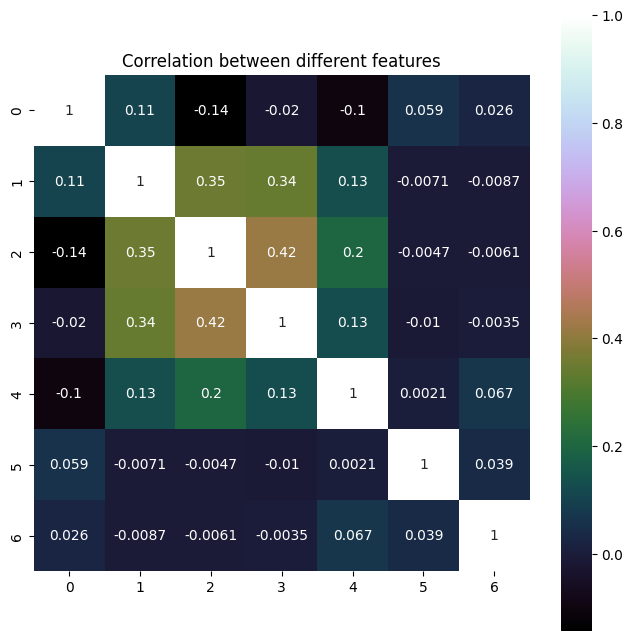

In [26]:
plt.figure(figsize=(8,8))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between different features')

In [30]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.08797699  0.29189921  0.27784886  0.33637135  0.79752505  0.26786864
  -0.09438973]
 [-0.50695734 -0.30996609 -0.70780994  0.07393548  0.33180877  0.1101505
  -0.13499526]
 [-0.5788351   0.77736008 -0.00657105 -0.19677589 -0.10338032 -0.10336241
  -0.02293518]
 [-0.54901653 -0.45787675  0.63497294 -0.25170987  0.10388959 -0.01034922
  -0.10714981]
 [-0.31354922 -0.05287224  0.12200054  0.78782241 -0.28404472  0.04036861
   0.42547869]
 [ 0.01930249 -0.04433104 -0.03622859 -0.05762997  0.37489883 -0.8048393
   0.45245222]
 [-0.00996933 -0.00391698 -0.04873036 -0.39411153  0.10557298  0.50589173
   0.75836313]]

Eigenvalues 
[1.83017431 0.54823098 0.63363587 0.84548166 1.12659606 0.95598647
 1.06036136]


In [31]:
# Make a list of(eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x:x[0],reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:
1.8301743138755022
1.1265960639915475
1.0603613622840855
0.9559864740066274
0.8454816637143456
0.6336358744830209
0.54823097654206


In [32]:
tot = sum(eig_vals)
var_exp = [(i /tot)*100 for i in sorted(eig_vals, reverse=True)]

AttributeError: module 'matplotlib.pyplot' has no attribute 'tight_layouut'

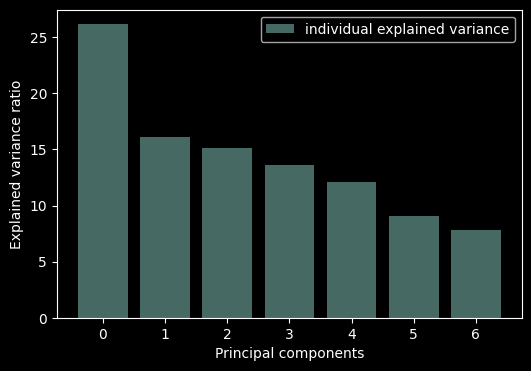

In [33]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    
    plt.bar(range(7), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layouut()

In [34]:
# Projection Matrix


matrix_w = np.hstack((eig_pairs[0][1].reshape(7,1),
                     eig_pairs[1][1].reshape(7,1)
                     ))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.08797699  0.79752505]
 [-0.50695734  0.33180877]
 [-0.5788351  -0.10338032]
 [-0.54901653  0.10388959]
 [-0.31354922 -0.28404472]
 [ 0.01930249  0.37489883]
 [-0.00996933  0.10557298]]


In [35]:
Y=X_std.dot(matrix_w)
Y

array([[ 1.90035018, -1.12083103],
       [-2.1358322 ,  0.2493369 ],
       [-3.05891625, -1.68312693],
       ...,
       [ 2.0507165 , -1.182032  ],
       [-2.91418496, -1.42752606],
       [ 1.91543672, -1.17021407]])

Text(0, 0.5, 'Cumulative explained variance')

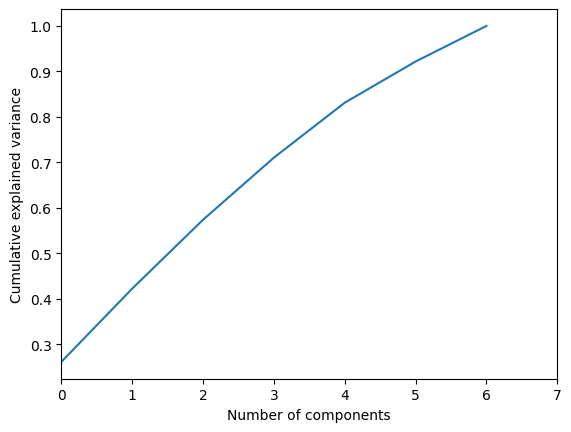

In [36]:
# PCA in scikit-learn
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [38]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(X_std)
print(X_std)

[[-0.93649469 -1.08727529 -1.46286291 ... -0.34123516 -0.41116529
  -0.14741182]
 [ 0.75281433  0.84070693  0.97111292 ...  1.71343614 -0.41116529
  -0.14741182]
 [-2.02247906  0.95755433  2.59376348 ...  0.34365527 -0.41116529
  -0.14741182]
 ...
 [-0.97671633 -1.08727529 -1.46286291 ... -0.34123516 -0.41116529
  -0.14741182]
 [-2.02247906  1.42494396  1.7824382  ...  0.34365527 -0.41116529
  -0.14741182]
 [-0.97671633 -1.14569899 -1.46286291 ... -0.34123516 -0.41116529
  -0.14741182]]


In [39]:
Y_sklearn.shape

(14999, 6)